# Experiments: Best arm identification in combinatorial Bandits with finite Budget

## Imports

In [10]:
import Distribution
from Distribution import DistNormal
from CSFramework import CombinatorialSuccessiveEliminationFramework
from RoundRobin import RoundRobin
import matplotlib.pyplot as plt
import numpy as np
from SuccessiveHalving import SuccessiveHalving
import ACExperiment
import random
import warnings
warnings.filterwarnings('ignore')

## Method comparison

In [63]:
# Initialize variables for experiment

n_arms_ = [50, 100]
subset_sizes = [2, 4, 6] # =k
Budgets = [50, 100] # =n
setting = "reward"
winner_setting = "borda"
borda_and_condorcet_different = False
runs = 100
diff_best_and_second_mean = 0.1 # =\epsilon
lower_mean_bound = 0 # =min \mu
upper_mean_bound = 1 # =max \mu
lower_scale_bound = 0.05 # =min \sigma
upper_scale_bound = 0.2 # =max \sigma
dependence_on_q = True
experiment = "other"

In [64]:
# Run experiment

# initializations
successes_csws = [[[] for k in subset_sizes] for B in Budgets]
successes_csr = [[[] for k in subset_sizes] for B in Budgets]
successes_csh = [[[] for k in subset_sizes] for B in Budgets]
successes_rr = [[[] for k in subset_sizes] for B in Budgets]
successes_sh = [[[] for k in subset_sizes] for B in Budgets]
if borda_and_condorcet_different:
    successes_csws_borda = [[[] for k in subset_sizes] for B in Budgets]
    successes_csr_borda = [[[] for k in subset_sizes] for B in Budgets]
    successes_csh_borda = [[[] for k in subset_sizes] for B in Budgets]
    successes_rr_borda = [[[] for k in subset_sizes] for B in Budgets]
    successes_sh_borda = [[[] for k in subset_sizes] for B in Budgets]
if experiment == "AC":
    rts = ACExperiment.read_running_times()
    dists = []
    best_arm = np.argmax(np.mean(rts, axis=0))
    borda_winner = best_arm
    second_best_mean = 1
    borda_winner_scale = 0.1
    runtimes_csws = [[[] for k in subset_sizes] for B in Budgets]
    runtimes_csr = [[[] for k in subset_sizes] for B in Budgets]
    runtimes_csh = [[[] for k in subset_sizes] for B in Budgets]
    runtimes_rr = [[[] for k in subset_sizes] for B in Budgets]
    runtimes_sh = [[[] for k in subset_sizes] for B in Budgets]
for n_arms in n_arms_:
    for B_id,B in enumerate(Budgets):
        for k_id,k in enumerate(subset_sizes):
            success_csws = 0
            success_csr = 0
            success_csh = 0
            success_rr = 0
            success_sh = 0
            if borda_and_condorcet_different:
                success_csws_borda = 0
                success_csr_borda = 0
                success_csh_borda = 0
                success_rr_borda = 0
                success_sh_borda = 0
            if experiment == "AC":
                runtime_csws = 0
                runtime_csr = 0
                runtime_csh = 0
                runtime_rr = 0
                runtime_sh = 0
            for i in range(runs): 
                if experiment != "AC":
                    dists, best_arm, borda_winner, second_best_mean, borda_winner_scale = Distribution.make_random_normal_dists(n_arms, diff_best_and_second_mean, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound)
                    if not borda_and_condorcet_different:
                        borda_winner = best_arm
                    rts = []
                else:
                    rts = rts.tolist()
                    random.shuffle(rts)
                    rts = np.array(rts)
                winner_csws = CombinatorialSuccessiveEliminationFramework(n_arms, k, B, dists, setting, "CSWS", best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)
                winner_csr = CombinatorialSuccessiveEliminationFramework(n_arms, k, B, dists, setting, "CSR", best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)
                winner_csh = CombinatorialSuccessiveEliminationFramework(n_arms, k, B, dists, setting, "CSH", best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)
                winner_rr = RoundRobin(n_arms, k, B, dists, setting, winner_setting, best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)    
                winner_sh = SuccessiveHalving(n_arms, B, dists, best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, experiment, rts)    
                if experiment == "AC":
                    winner_csws, rt_csws = CombinatorialSuccessiveEliminationFramework(n_arms, k, B, dists, setting, "CSWS", best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)
                    winner_csr, rt_csr = CombinatorialSuccessiveEliminationFramework(n_arms, k, B, dists, setting, "CSR", best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)
                    winner_csh, rt_csh = CombinatorialSuccessiveEliminationFramework(n_arms, k, B, dists, setting, "CSH", best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)
                    winner_rr, rt_rr = RoundRobin(n_arms, k, B, dists, setting, winner_setting, best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, dependence_on_q, lower_mean_bound, upper_mean_bound, lower_scale_bound, upper_scale_bound, experiment, rts)    
                    winner_sh, rt_sh = SuccessiveHalving(n_arms, B*k, dists, best_arm, borda_winner, second_best_mean, diff_best_and_second_mean, borda_winner_scale, experiment, rts)    
                    runtime_csws += rt_csws
                    runtime_csr += rt_csr
                    runtime_csh += rt_csh
                    runtime_rr += rt_rr
                    runtime_sh += rt_sh
                if winner_csws == best_arm :
                    success_csws += 1
                if winner_csr == best_arm :
                    success_csr += 1
                if winner_csh == best_arm :
                    success_csh += 1
                if winner_rr == best_arm :
                    success_rr += 1
                if winner_sh == best_arm :
                    success_sh += 1
                if borda_and_condorcet_different:
                    if winner_csws == borda_winner :
                        success_csws_borda += 1
                    if winner_csr == borda_winner :
                        success_csr_borda += 1
                    if winner_csh == borda_winner :
                        success_csh_borda += 1
                    if winner_rr == borda_winner :
                        success_rr_borda += 1
                    if winner_sh == borda_winner :
                        success_sh_borda += 1
            successes_csws[B_id][k_id].append(success_csws/runs)
            successes_csr[B_id][k_id].append(success_csr/runs)
            successes_csh[B_id][k_id].append(success_csh/runs)
            successes_rr[B_id][k_id].append(success_rr/runs)
            successes_sh[B_id][k_id].append(success_sh/runs)
            if borda_and_condorcet_different:
                successes_csws_borda[B_id][k_id].append(success_csws_borda/runs)
                successes_csr_borda[B_id][k_id].append(success_csr_borda/runs)
                successes_csh_borda[B_id][k_id].append(success_csh_borda/runs)
                successes_rr_borda[B_id][k_id].append(success_rr_borda/runs)
                successes_sh_borda[B_id][k_id].append(success_sh_borda/runs)
            if experiment == "AC":
                runtimes_csws[B_id][k_id].append(runtime_csws/runs)
                runtimes_csr[B_id][k_id].append(runtime_csr/runs)
                runtimes_csh[B_id][k_id].append(runtime_csh/runs)
                runtimes_rr[B_id][k_id].append(runtime_rr/runs)
                runtimes_sh[B_id][k_id].append(runtime_sh/runs)

# Plot results

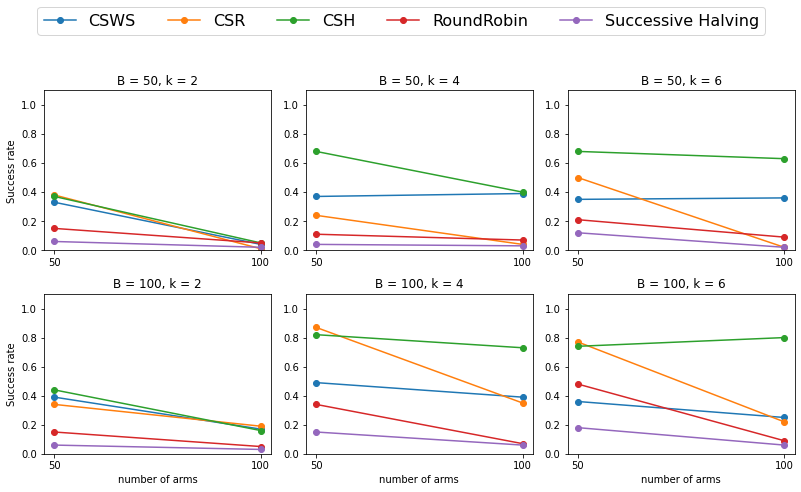

In [70]:
# plot success rate in dependence of number of arms n_arms

fig, ax = plt.subplots(len(Budgets), len(subset_sizes))  
fig.set_figheight(len(Budgets)*3)
fig.set_figwidth(len(subset_sizes)*3.75)
for B_id, B in enumerate(Budgets):
    for k_id,k in enumerate(subset_sizes):
        name = "CSWS"
        ax[B_id, k_id].plot(n_arms_, np.array(successes_csws)[B_id,k_id,:],'o-', label=name) 
        name = "CSR"
        ax[B_id, k_id].plot(n_arms_, np.array(successes_csr)[B_id,k_id,:],'o-', label=name) 
        name = "CSH"
        ax[B_id, k_id].plot(n_arms_, np.array(successes_csh)[B_id,k_id,:],'o-', label=name) 
        name = "RoundRobin"
        ax[B_id, k_id].plot(n_arms_, np.array(successes_rr)[B_id,k_id,:],'o-', label=name) 
        name = "Successive Halving"
        ax[B_id, k_id].plot(n_arms_, np.array(successes_sh)[B_id,k_id,:],'o-', label=name) 
        name = "B = " + str(B) + ", k = " + str(k)
        ax[B_id, k_id].set_title(name)    
        if k_id == 0:
            ax[B_id, k_id].set_ylabel('Success rate') 
            ax[B_id, k_id].set_ylim(0,1.1)
        if B_id == len(Budgets)-1:
            ax[B_id, k_id].set_xlabel('number of arms') 
        ax[B_id, k_id].set_xticks(n_arms_)
        ax[B_id, k_id].set_ylim(0,1.1)
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fontsize=16)
fig.tight_layout()
plt.show()

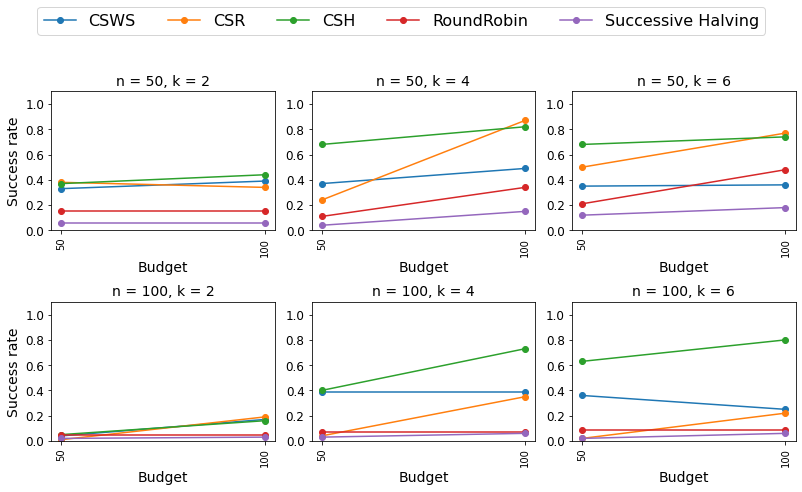

In [68]:
# plot success rate in dependence on available budget B

fig, ax = plt.subplots(len(n_arms_),len(subset_sizes))  
fig.set_figheight(len(Budgets)*3)
#fig.set_figheight(3)
fig.set_figwidth(len(subset_sizes)*3.75)
for n_id, n_arm in enumerate(n_arms_):
    for k_id,k in enumerate(subset_sizes):
        name = "CSWS"
        ax[n_id,k_id].plot(Budgets, np.array(successes_csws)[:,k_id,n_id],'o-', label=name) 
        name = "CSR"
        ax[n_id,k_id].plot(Budgets, np.array(successes_csr)[:,k_id,n_id],'o-', label=name) 
        name = "CSH"
        ax[n_id,k_id].plot(Budgets, np.array(successes_csh)[:,k_id,n_id],'o-', label=name) 
        name = "RoundRobin"
        ax[n_id,k_id].plot(Budgets, np.array(successes_rr)[:,k_id,n_id],'o-', label=name) 
        name = "Successive Halving"
        ax[n_id,k_id].plot(Budgets, np.array(successes_sh)[:,k_id,n_id],'o-', label=name) 
        name = "n = " + str(n_arm) + ", k = " + str(k)
        ax[n_id,k_id].set_title(name)    
        if k_id == 0:
            ax[n_id,k_id].set_ylabel('Success rate') 
        ax[n_id,k_id].set_ylim(0,1.1)
        ax[n_id,k_id].set_xlabel('Budget') 
        ax[n_id,k_id].set_xticks(Budgets)
        y_labels = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
        ax[n_id,k_id].set_yticklabels(y_labels, fontsize=12)
        ax[n_id,k_id].set_xticklabels(ax[n_id,k_id].get_xticks(), rotation = 90)
        ax[n_id,k_id].set_ylim(0,1.1)
        ax[n_id,k_id].title.set_size(14)
        ax[n_id,k_id].yaxis.label.set_size(14)
        ax[n_id,k_id].xaxis.label.set_size(14)
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fontsize=16)
fig.tight_layout()
plt.show()

# save data

In [14]:
name = "csws.npy"
np.save(name, successes_csws)
name = "csr.npy"
np.save(name, successes_csr)
name = "csh.npy"
np.save(name, successes_csh)
name = "rr.npy"
np.save(name, successes_rr)
name = "sh.npy"
np.save(name, successes_sh)